## Tasks:- 
Explain the text processing pipeline adopted by you.

Generate term statistics: [You can use nltk, Stanford parsers, spacy etc.]

Vocabulary size with word frequencies
N-grams

POS collections (Like Nouns - frequency, Verbs - frequency, Adverbs - frequency etc.)

Most Frequent Noun Phrases

Most Frequent Verb Phrases.

NERs with their frequencies and types.

Which set of terms best describe your corpus? How did you arrive at it?
Create a visualization and justify your answer for 3.

Plot a graph of the frequency of word vs rank of the word. How would you characterize the relationship? For your reference - consult “Zipf’s law” – and determine the best fit for your corpus? 


#Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import re
import random
from spacy import displacy
import nltk
from nltk import *
from nltk.corpus import webtext, stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.probability import FreqDist
from nltk.util import ngrams
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
import textblob
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

import gzip
import spacy
from google.colab import drive
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# Accessing Google Drive Dataset

In [ ]:
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


# Extracting Zip Drive Data

In [ ]:
import pandas as pd
import numpy as np
import glob

all_files = glob.glob('/content/gdrive/MyDrive/Copy of reviews_CDs_and_Vinyl_5.json.gz')
li = []

for filename in all_files:
    df = pd.read_json(
        filename,
        lines=True,
        compression='gzip'
    )
    
    li.append(df)

# Data PreProcessing



*   Shape of data
*   Sample size of data
*   Data Sample
*   remove noise from data
*   Removal of Stop words
*   Toknization 
*   Lemmatization
*   



In [ ]:
df.shape

(1097592, 9)

In [ ]:
df = df.sample(n=26000,random_state=None,replace=bool)

In [ ]:
df.head(10)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
374585,A2NFTFQYW8GXIQ,B00000DHSL,A. Andersen,"[4, 5]",52 years after its debut this 1949 recording i...,5,Still the best recording of the show.,989193600,"05 7, 2001"
224579,A13A1VWTPL9W7J,B000002O50,"Nick Carmine ""Nick Carmine""","[1, 2]","A quarter of a century has passed, and out of ...",5,The Perfect Soundtrack for an Avid Fan...or An...,1281052800,"08 6, 2010"
842180,A2NP5H6JAU53B,B000G2YC8S,thephatman2000,"[0, 0]","I did not own this CD, therefore, I had to pur...",4,"Yes, I am fan of the Jazzmasters also.",1372291200,"06 27, 2013"
956521,A1T9SCT89JJ96,B0029LHW5E,David Townsend,"[0, 1]",The songs on this CD were part of a list of th...,5,A great collection from Rosanne Cash,1266105600,"02 14, 2010"
973028,A2X4W6929Z2QIX,B002VZC9I8,Glenn Bell,"[0, 0]",i have been a fan of toni's from the first tim...,5,toni is still the best at the music thing,1273536000,"05 11, 2010"
995177,A1AYFXJOXO4GHO,B00417HV6Y,Charles Foster Kane,"[1, 1]",If you like electric rock/blues guitar you can...,5,Top Quality Great Guitar,1301356800,"03 29, 2011"
490529,A2D0PI4CACTE7I,B00004ZAV3,"happydogpotatohead ""happydogpotatohead""","[8, 25]",Let's face it. If you don't have all these so...,1,Beat(le)ing a Dead Horse,975283200,"11 27, 2000"
356078,A3TJ3638E3VVXW,B000008M1P,"Wolfy ""Secret Werewolf""","[0, 0]",Gotta say there is something about seeing a bu...,5,Old school Chick rock!,1391990400,"02 10, 2014"
413520,A39PCD4D9R1C16,B00000K0W2,Armindo,"[1, 1]",And that is Caballe five years later at her La...,5,Great but there is an even greater Lucrezia...,1130025600,"10 23, 2005"
118241,A15WWL1MULETVF,B0000026AZ,"G. Donald ""gerk...!""","[3, 3]",Anyone who knows Mary Chapin Carpenter must ag...,5,MCC at her best...,1227398400,"11 23, 2008"


In [ ]:
def preprocessingOfText(text):
  # Remove anything that is not a letter or number
  text2=text
  text=""
  for character in text2:
    if character.isalnum():
        text += character
  text=text.lower()
  # Stop wod removals
  stop = stopwords.words("english")
  # Tokenization of text
  tokens = [word for word in (token for token in word_tokenize(text)) if word not in stop]
  #preprocessed_text = ' '.join([word for word in tokens])
  #Lemmatizating the words using word net
  lmtizer = nltk.WordNetLemmatizer()
  preprocessed_text = ' '.join([lmtizer.lemmatize(word) for word in tokens])
  return preprocessed_text

In [ ]:
df['reviewText'] = df['reviewText'].astype(str)
df['reviewText'] = df['reviewText'].apply(preprocessingOfText)

In [ ]:
text = list(df['reviewText'])

Print sample of preprocessing Text

In [ ]:
print(text[0:20])

['year debut 99 recording still best recording exception film soundtrack original stage show ever made extraordinary sound remarkable compared cast album decca rca capitol time period columbia always state art sound wise show performance fresh lilting moving martin excels honey bun pinza equally well enchanted evening nearly mine male chorus great job nothing like damewhile second cast album released lp kiss kate -also columbia - first also geared rpm reproduction cut maximum side could hold nothing seems rushed indeed columbia industry one better released sp disc side industry standard either quot disc quot disc - thus allowing u musicodd note parenthesis twin soliloques read wonder feel lyric nellie sings quotwonder id feelquot - nowhere parenthesized second title orignal lyric although song presented nothin like dame - listen guy - enunciate quotnothingquot dozen timesthe original album without added filler came - generous industry standardswith wonderful show wonderfully sung playe

In [ ]:
words = [i for item in text for i in item.split()]

In [ ]:
print(words[:10])

['wowcan', 'imagine', 'diana', 'ross', 'christmas', 'musicwellthis', 'one', 'best', 'cd', 'ever']


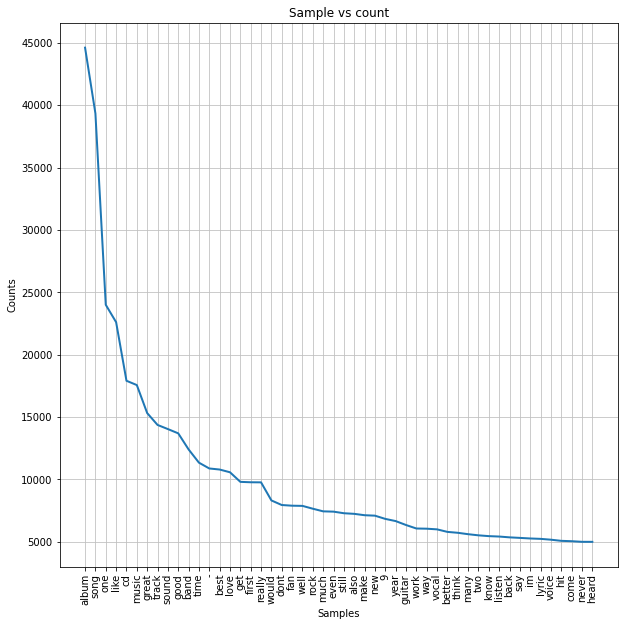

In [ ]:
plt.figure(figsize=(10, 10)) 
plt.title("Sample vs count")
nlp_words = nltk.FreqDist(words)
nlp_words.plot(50)

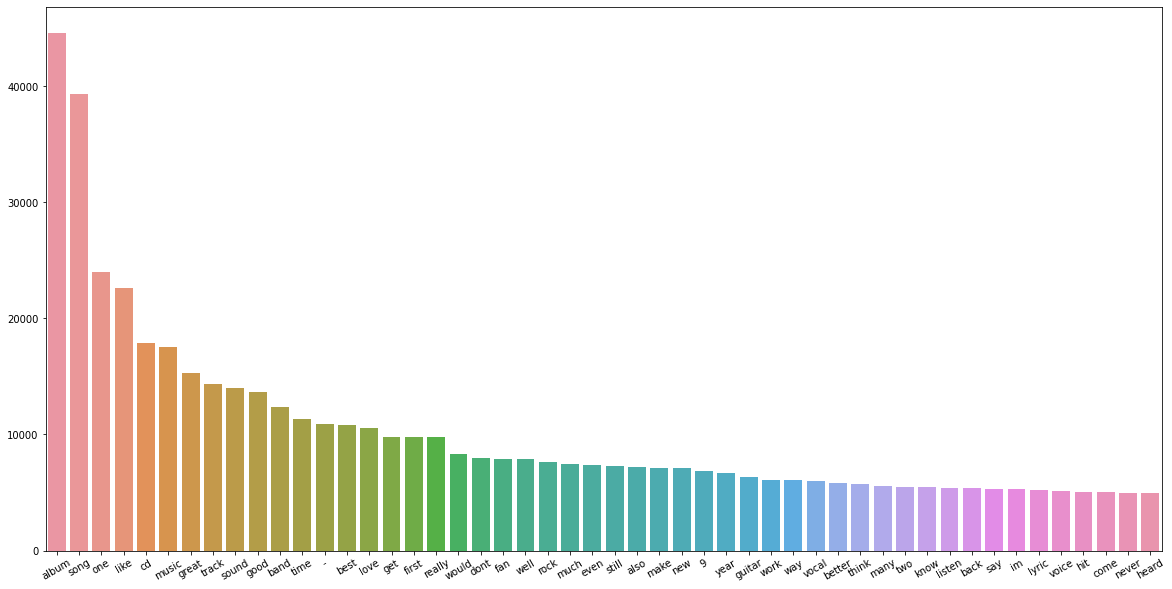

In [ ]:
## Creating FreqDist for whole BoW, keeping the 20 most common tokens
all_fdist = FreqDist(words).most_common(50)

## Conversion to Pandas series via Python Dictionary for easier plotting
all_fdist = pd.Series(dict(all_fdist))

## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(20,10))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
plt.xticks(rotation=30);

## Extracting N-gram

In [ ]:
esTrigrams = ngrams(words, 3)
esTigramFreq = collections.Counter(esTrigrams)

In [ ]:
esTigramFreq.most_common(10)

[(('--', '--', '--'), 421),
 (('rock', 'n', 'roll'), 301),
 (('ive', 'ever', 'heard'), 230),
 (('one', 'best', 'album'), 224),
 (('best', 'song', 'album'), 203),
 (('dont', 'get', 'wrong'), 163),
 (('one', 'best', 'song'), 154),
 (('first', 'time', 'heard'), 151),
 (('favorite', 'song', 'album'), 144),
 (('cant', 'go', 'wrong'), 120)]

In [ ]:
df['tokenized_review'] = df.apply(lambda i:  nltk.word_tokenize(i['reviewText']), axis=1)
df['POS_Tags'] = df.apply(lambda i: nltk.pos_tag(i['tokenized_review']), axis=1)

# Extracting POS

In [ ]:
def nouns(text):
    blob = TextBlob(text)
    return [word for (word,tag) in blob.tags if tag.startswith('NN')]
def pronouns(text):
    blob = TextBlob(text)
    return [word for (word,tag) in blob.tags if tag.startswith('WP')]
def adjectives(text):
    blob = TextBlob(text)
    return [word for (word,tag) in blob.tags if tag == 'JJ']
def verbs(text):
    blob = TextBlob(text)
    return [word for (word,tag) in blob.tags if tag.startswith('VB')]
def adverbs(text):
    blob = TextBlob(text)
    return [word for (word,tag) in blob.tags if tag.startswith('RB')]
def foreign_word(text):
    blob = TextBlob(text)
    return [word for (word,tag) in blob.tags if tag.startswith('FW')]
def preposition(text):
    blob = TextBlob(text)
    return [word for (word,tag) in blob.tags if tag.startswith('IN')]
def interjection(text):
    blob = TextBlob(text)
    return [word for (word,tag) in blob.tags if tag.startswith('UH')]

In [ ]:
df['Nouns']       = df['reviewText'].apply(nouns)
df['Pronouns']    = df['reviewText'].apply(pronouns)
df['Adjectives']  = df['reviewText'].apply(adjectives)
df['Verbs']       = df['reviewText'].apply(verbs)
df['Adverbs']     = df['reviewText'].apply(adverbs)
df['Foreign_word']= df['reviewText'].apply(foreign_word)
df['Preposition'] = df['reviewText'].apply(preposition)
df['Interjection']= df['reviewText'].apply(interjection)

In [ ]:
df.head(10)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,tokenized_review,POS_Tags,Nouns,Pronouns,Adjectives,Verbs,Adverbs,Foreign_word,Preposition,Interjection
374585,A2NFTFQYW8GXIQ,B00000DHSL,A. Andersen,"[4, 5]",year debut 99 recording still best recording e...,5,Still the best recording of the show.,989193600,"05 7, 2001","[year, debut, 99, recording, still, best, reco...","[(year, NN), (debut, NN), (99, CD), (recording...","[year, debut, recording, exception, film, soun...",[],"[original, extraordinary, remarkable, capitol,...","[recording, made, compared, moving, evening, r...","[still, ever, always, equally, well, nearly, f...",[],"[like, although, nothin, like, without]",[]
224579,A13A1VWTPL9W7J,B000002O50,"Nick Carmine ""Nick Carmine""","[1, 2]",quarter century passed blue got news ive waiti...,5,The Perfect Soundtrack for an Avid Fan...or An...,1281052800,"08 6, 2010","[quarter, century, passed, blue, got, news, iv...","[(quarter, NN), (century, NN), (passed, VBD), ...","[quarter, century, news, ive, eighty, manhunte...",[],"[blue, late, available, song, good, disc, unli...","[passed, got, waiting, collins, singing, wont,...","[finally, simply, maybe, ever, well, also, you...",[],"[since, like, like, like, upon, underscore]",[]
842180,A2NP5H6JAU53B,B000G2YC8S,thephatman2000,"[0, 0]",cd therefore purchase singing music say person...,4,"Yes, I am fan of the Jazzmasters also.",1372291200,"06 27, 2013","[cd, therefore, purchase, singing, music, say,...","[(cd, NN), (therefore, RB), (purchase, NN), (s...","[cd, purchase, music, person, jazz]",[],[smooth],"[singing, say, enjoy, recommended]","[therefore, highly]",[],[],[]
956521,A1T9SCT89JJ96,B0029LHW5E,David Townsend,"[0, 1]",song cd part list important song country music...,5,A great collection from Rosanne Cash,1266105600,"02 14, 2010","[song, cd, part, list, important, song, countr...","[(song, JJ), (cd, NN), (part, NN), (list, NN),...","[cd, part, list, country, music, cash, hope, l...",[],"[song, important, song, johnny, daughter, cove...","[gave, chooses, take, refreshing, songwriting,...","[always, always, always, nicely, also]",[],[],[]
973028,A2X4W6929Z2QIX,B002VZC9I8,Glenn Bell,"[0, 0]",fan tonis first time heard love shoulda brough...,5,toni is still the best at the music thing,1273536000,"05 11, 2010","[fan, tonis, first, time, heard, love, shoulda...","[(fan, NN), (tonis, NN), (first, JJ), (time, N...","[fan, tonis, time, shoulda, home, love, voice,...",[],"[first, fan, good, need, free, cd, fair, many,...","[heard, brought, start, supporting, stealing, ...","[advise, seriously, always, back, instead, pulse]",[],"[love, like, like, like, like]",[]
995177,A1AYFXJOXO4GHO,B00417HV6Y,Charles Foster Kane,"[1, 1]",like electric rockblues guitar cant go wrong e...,5,Top Quality Great Guitar,1301356800,"03 29, 2011","[like, electric, rockblues, guitar, cant, go, ...","[(like, IN), (electric, JJ), (rockblues, NNS),...","[rockblues, guitar, cant, recording, bonamassa...",[],"[electric, wrong, live, great, great, tight, b...","[go, exciting, playing, rocking, soaring, put,...",[],[],[like],[]
490529,A2D0PI4CACTE7I,B00004ZAV3,"happydogpotatohead ""happydogpotatohead""","[8, 25]",let face dont song already probably dont like ...,1,Beat(le)ing a Dead Horse,975283200,"11 27, 2000","[let, face, dont, song, already, probably, don...","[(let, VB), (face, NN), (dont, VB), (song, JJ)...","[face, music, cd, company, mix, tape, quotever...",[],"[song, record, mystery, oh, outthey, rubbish, ...","[let, dont, dont, buy, dont, sing, decided, ne...","[already, probably, essentially, probably, sti...",[],"[like, like]",[]
356078,A3TJ3638E3VVXW,B000008M1P,"Wolfy ""Secret Werewolf""","[0, 0]",got ta say something seeing bunch chick stage ...,5,Old school Chick rock!,1391990400,"02 10, 2014","[got, ta, say, something, seeing, bunch, chick...","[(got, VBD), (ta, NNS), (say, VBP), (something...","[ta, something, chick, stage, get, replacement...",[],"[bunch

In [ ]:
def POS_frequency(words):
  POS_tag = list(words)
  POS_tag = [i for j in POS_tag for i in j]
  plt.figure(figsize=(10, 10)) 
  #plt.title(words)
  # FreqDist is used for extract frequency of word
  word_fdist = FreqDist(POS_tag).most_common(50) 
  word_fdist = pd.Series(dict(word_fdist))
  fig, ax = plt.subplots(figsize=(20,10))
  all_plot = sns.barplot(x=word_fdist.index, y=word_fdist.values, ax=ax)
  plt.xticks(rotation=30);

<Figure size 720x720 with 0 Axes>

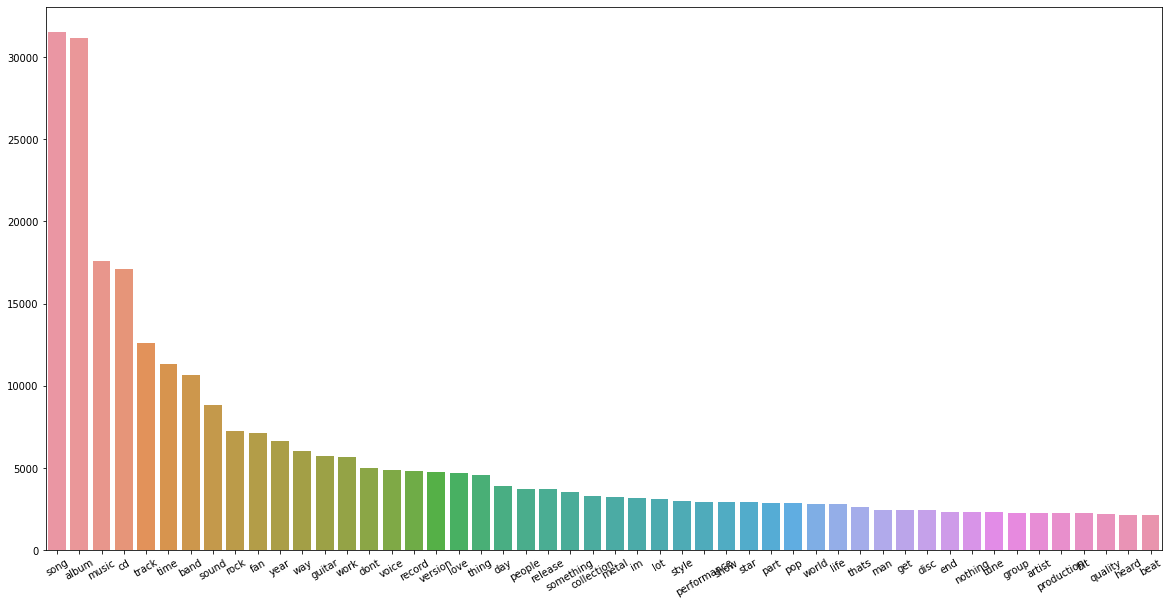

In [ ]:
POS_frequency(df['Nouns'])

<Figure size 720x720 with 0 Axes>

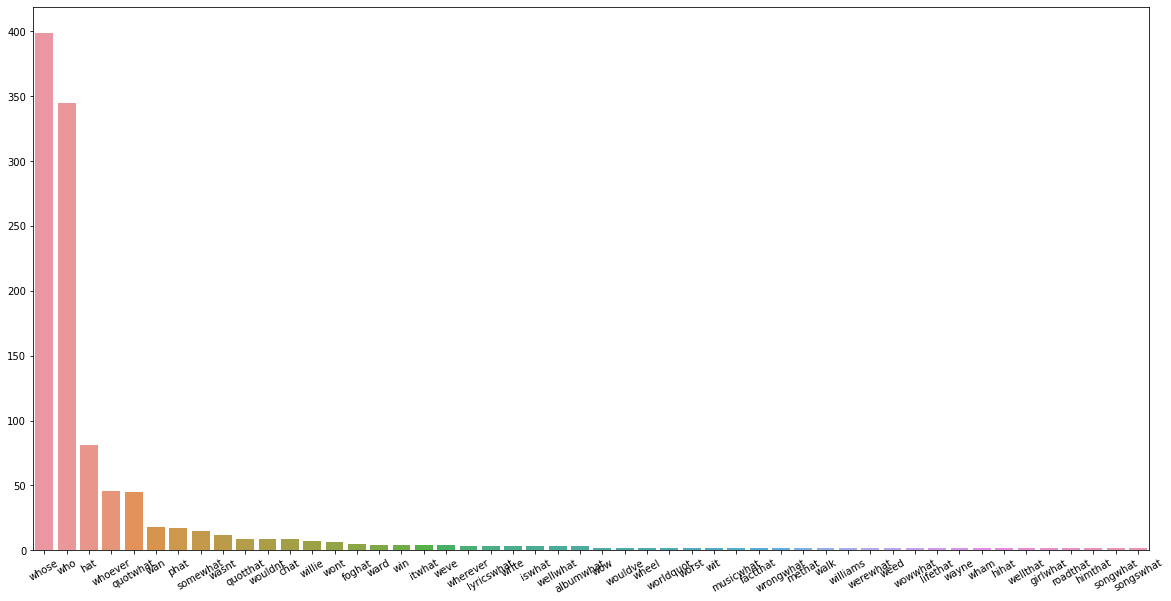

In [ ]:
POS_frequency(df['Pronouns'])

<Figure size 720x720 with 0 Axes>

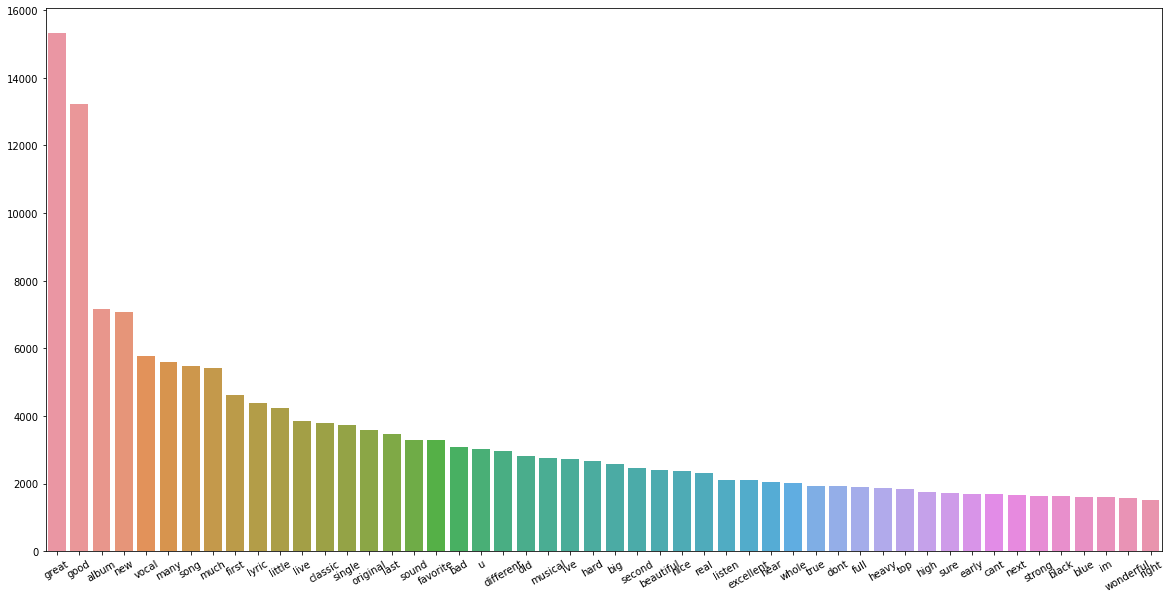

In [ ]:
POS_frequency(df['Adjectives'])

<Figure size 720x720 with 0 Axes>

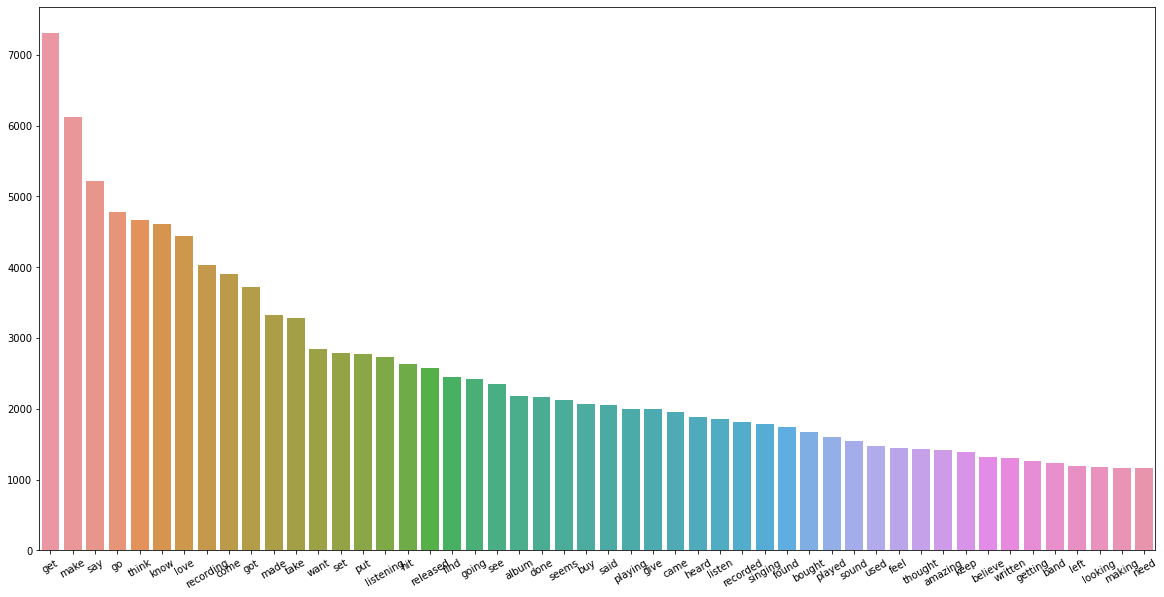

In [ ]:
POS_frequency(df['Verbs'])

<Figure size 720x720 with 0 Axes>

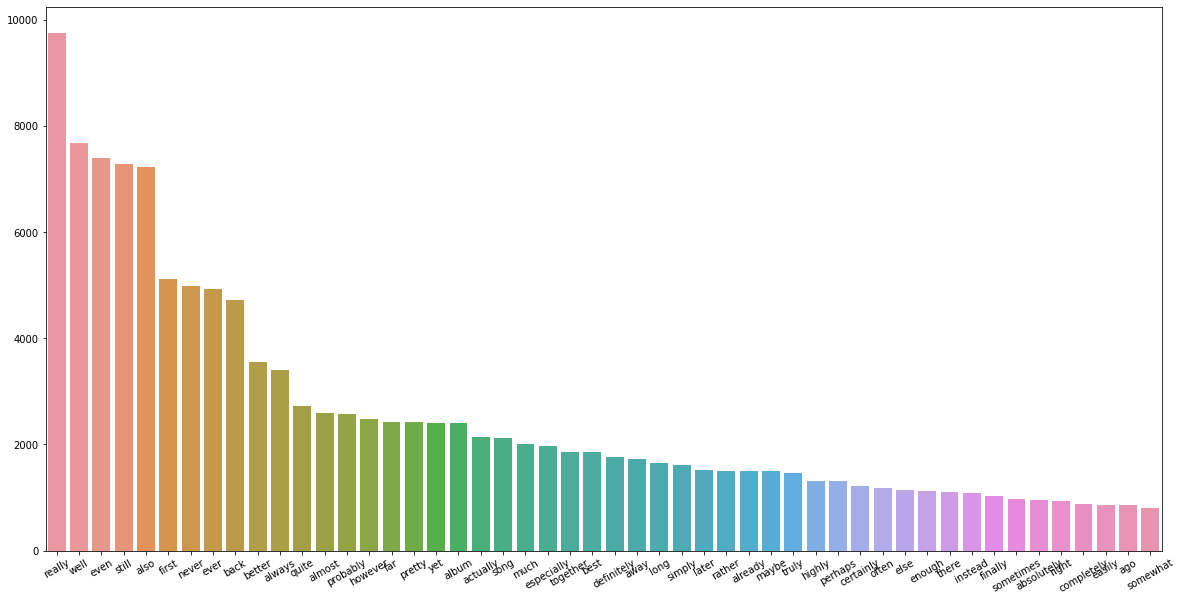

In [ ]:
POS_frequency(df['Adverbs'])

<Figure size 720x720 with 0 Axes>

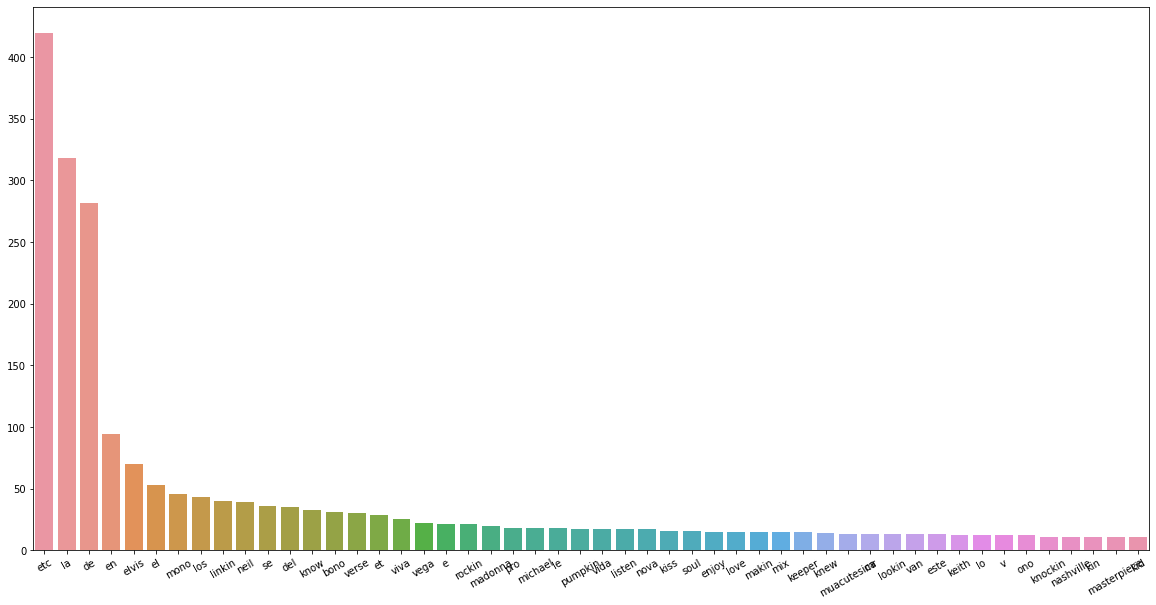

In [ ]:
POS_frequency(df['Foreign_word'])

<Figure size 720x720 with 0 Axes>

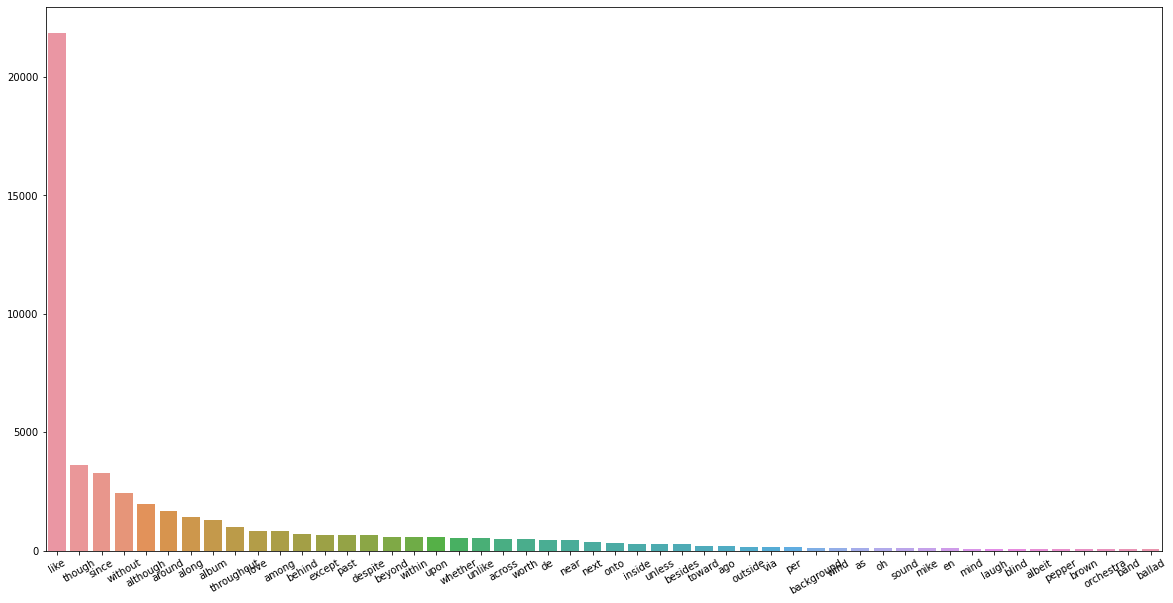

In [ ]:
POS_frequency(df['Preposition'])

<Figure size 720x720 with 0 Axes>

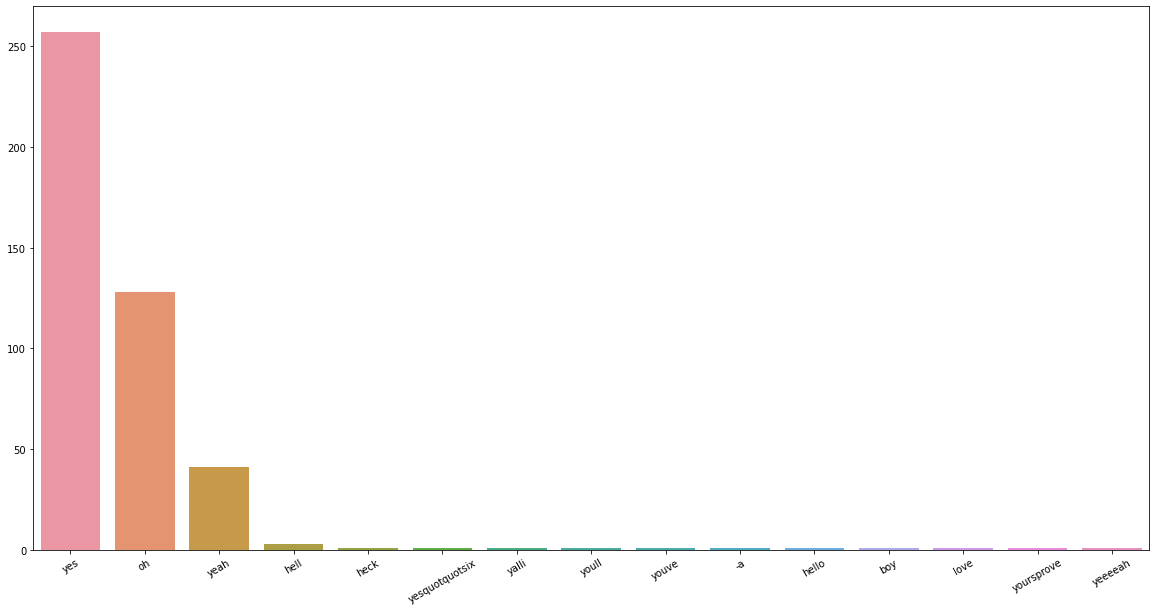

In [ ]:
POS_frequency(df['Interjection'])

# Name Entity Recognition

In [ ]:
NER = spacy.load("en_core_web_sm")

In [ ]:
named_entities = []
for words in text:
    temp_entities_name = ''
    temp_named_entities = None
    words = NER(words)
    for word in words:
        term = word.text 
        tags= word.ent_type_
        if tags:
            temp_entities_name = ' '.join([temp_entities_name, term]).strip()
            temp_named_entities = (temp_entities_name, tags)
        else:
            if temp_named_entities:
                named_entities.append(temp_named_entities)
                temp_entities_name = ''
                temp_named_entities = None

entity_frame = pd.DataFrame(named_entities, 
                            columns=['Entity Name', 'Entity Type'])

In [ ]:
top_entities = (entity_frame.groupby(by=['Entity Name', 'Entity Type']).size().sort_values(ascending=False).reset_index().rename(columns={0 : 'Frequency'}))
top_entities.T.iloc[:,:100]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
Entity Name,one,first,9,two,second,three,99,album,today,year,four,american,five,third,half,song,madonna,british,ten,christian,amazon,first two,intro,christmas,english,dvd,uk,america,year ago,melodic,summer,last year,million,night,mtv,tonight,six,day,chicago,spanish,...,hollywood,nine,joe,german,california,columbia,eight,first three,italian,nashville,cole,synth,dozen,irish,beethoven,second half,kinda,sunday,99s,first half,broadway,tom,zero,tomorrow,west coast,texas,eagle,sony,fifth,russian,sarah,midnight,nd,first one,michael jackson,mahler,bach,nd,album song,morning
Entity Type,CARDINAL,ORDINAL,CARDINAL,CARDINAL,ORDINAL,CARDINAL,CARDINAL,PERSON,DATE,DATE,CARDINAL,NORP,CARDINAL,ORDINAL,CARDINAL,PERSON,PERSON,NORP,CARDINAL,NORP,ORG,CARDINAL,PERSON,DATE,LANGUAGE,GPE,GPE,GPE,DATE,ORG,DATE,DATE,CARDINAL,TIME,ORG,TIME,CARDINAL,DATE,GPE,NORP,...,GPE,CARDINAL,PERSON,NORP,GPE,ORG,CARDINAL,CARDINAL,NORP,GPE,PRODUCT,ORDINAL,CARDINAL,NORP,PERSON,CARDINAL,GPE,DATE,CARDINAL,CARDINAL,FAC,PERSON,CARDINAL,DATE,LOC,GPE,ORG,ORG,ORDINAL,NORP,PERSON,TIME,ORG,CARDINAL,PERSON,PERSON,PERSON,GPE,PERSON,TIME
Frequency,16236,6001,4411,4163,1924,1604,1127,1092,1020,1004,897,795,714,595,529,359,342,338,323,317,315,303,303,302,288,287,265,257,248,242,225,225,223,218,212,212,200,192,187,186,...,114,113,111,108,106,106,106,106,105,104,103,102,101,99,99,98,97,96,95,95,93,90,90,89,89,88,88,87,86,85,81,81,80,80,78,78,78,78,77,77


In [ ]:
def key_words(n):

  kwargs = {
            'ngram_range': (1, 2), 
            'dtype': 'int32',
            'strip_accents': 'unicode',
            'decode_error': 'replace',
            'analyzer': 'word', 
            'min_df': 2,
    }
  vectorizer = TfidfVectorizer(**kwargs)
  tfidf_matrix = vectorizer.fit_transform(df['reviewText'])
  important_words_indices = np.argsort(np.asarray(tfidf_matrix.sum(axis=0))[0])[::-1]
  tfidf_feature_names = np.array(vectorizer.get_feature_names())
  print(tfidf_feature_names[important_words_indices[:n]])
  importance = np.asarray(tfidf_matrix.sum(axis=0))[0]
  plt.figure(figsize=(20, 10))
  plt.plot(tfidf_feature_names[important_words_indices[:n]], importance[important_words_indices[:n]])
  plt.xticks(rotation = 45)
  plt.xlabel("Key Words")
  plt.ylabel("Importance")
  plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:2032: UserWarning:

Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



['album' 'song' 'cd' 'one' 'like' 'music' 'great' 'good' 'track' 'sound'
 'band' 'love' 'best' 'time' 'really' 'get' 'first' 'rock' 'fan' 'dont'
 'well' 'would' 'still' 'much' 'new' 'listen' 'even' 'year' 'make'
 'better']


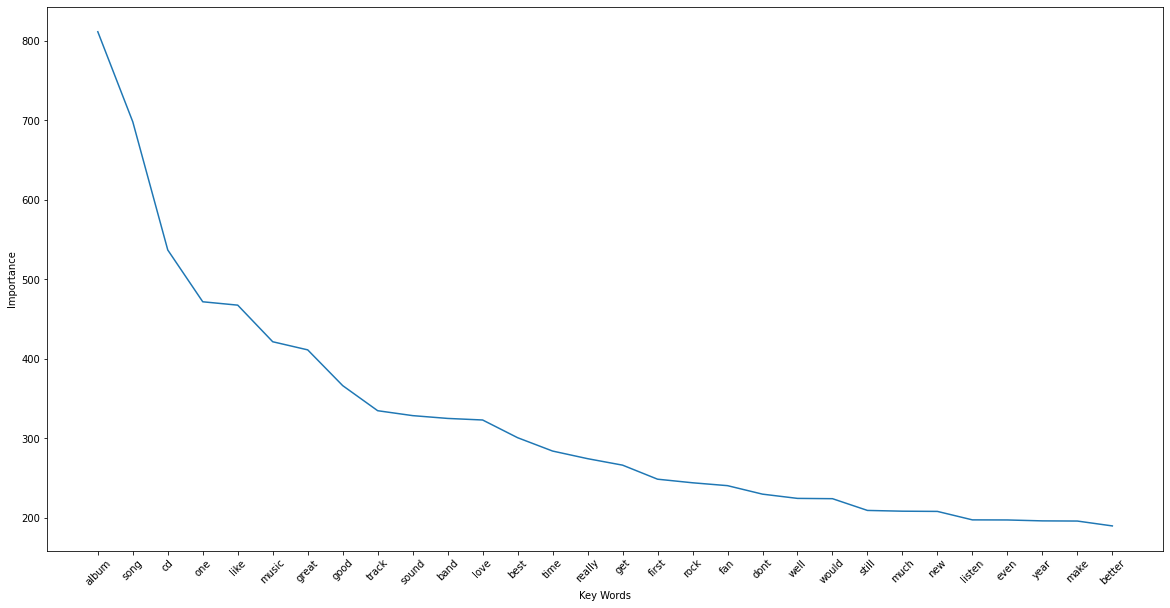

In [ ]:
key_words(30)